## Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd '/content/drive/My Drive/generative-scattering-networks'
%matplotlib nbagg

In [ ]:
%pip install -r requirements.txt

## Local

In [1]:
%cd ..
%matplotlib nbagg

/home/elias/work/generative-scattering-networks


## Notebook

In [4]:
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from kymatio import Scattering2D
from PIL import Image
from torchvision.transforms import ToTensor, Resize, Compose

from datasets import EmbeddingsTransformDataset, ImageDataset
from config import celeba_hq_train, celeba_hq_test, DATASETS_PATH

In [4]:
im = Image.open("/home/elias/datasets/celeba_hq/1024_rgb/train/0.jpg")
print(im)

transform = Compose([
    Resize((128, 128)),
    ToTensor(),
])

x = transform(im)
print(x.shape)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7F0E4B7D5BA8>
torch.Size([3, 128, 128])


In [20]:
scattering = Scattering2D(J=4, shape=(128, 128))

In [21]:
Sx = scattering(x)
print(Sx.shape)

torch.Size([3, 417, 8, 8])


In [24]:
X = Sx.view(-1, 8, 8)
print(X.shape)

torch.Size([1251, 8, 8])


<IPython.core.display.Javascript object>


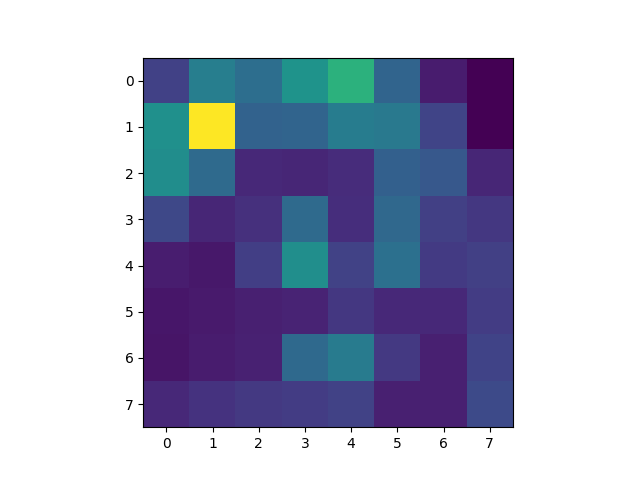

[]

In [31]:
plt.figure()
plt.imshow(X[5,:,:].reshape(8, 8))
plt.plot()

In [5]:
dataset = EmbeddingsTransformDataset(
    '/home/elias/datasets/celeba_hq/1024_rgb_SJ4/train/',
    '/home/elias/datasets/celeba_hq/1024_rgb/train/',
    transform)

<IPython.core.display.Javascript object>


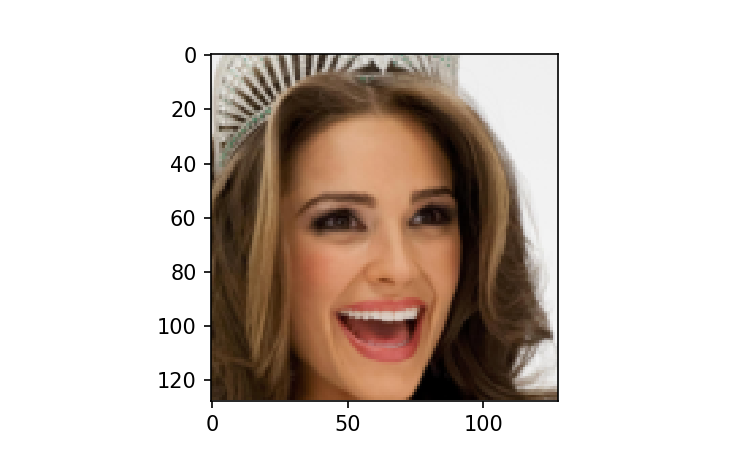

[]

In [7]:
plt.figure(figsize=(5, 3))
plt.imshow(((dataset[0]['x'].permute(1, 2, 0) + 1)*127.5))
plt.plot()

<IPython.core.display.Javascript object>


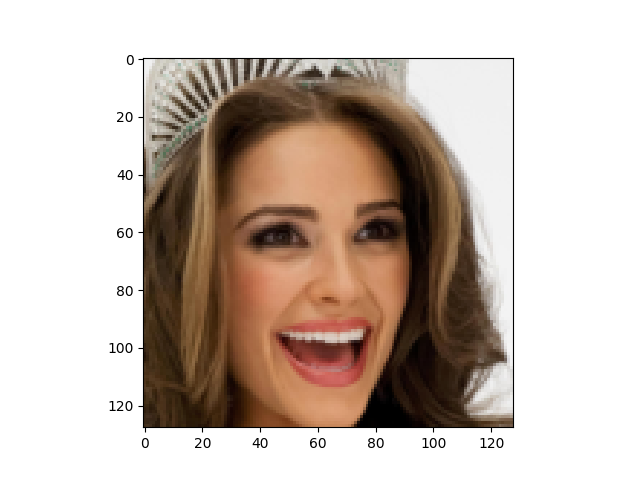

In [16]:
image = np.uint8(((dataset[0]['x'].permute(1, 2, 0) + 1)*127.5)*255)

plt.figure()
plt.imshow(image)
plt.show()

In [ ]:
# debug colab

transform = Compose([
    Resize((128, 128)),
    ToTensor(),
])

train = EmbeddingsTransformDataset(
    os.path.join(DATASETS_PATH, 'celeba_hq/1024_rgb_SJ4/train/'),
    os.path.join(DATASETS_PATH, 'celeba_hq/1024_rgb/train/'),
    transform,
    nb_files=celeba_hq_train,
)
test = EmbeddingsTransformDataset(
    os.path.join(DATASETS_PATH, 'celeba_hq/1024_rgb_SJ4/test/'),
    os.path.join(DATASETS_PATH, 'celeba_hq/1024_rgb/test/'),
    transform,
    nb_files=celeba_hq_test,
)

for i in range(len(train)):
    try:
        _ = train[i]
    except:
        print(f"missing: train/{i}.jpg")
        

for i in range(len(test)):
    try:
        _ = test[i]
    except:
        print(f"missing: test/{i}.jpg")